### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Hockey']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 5084    Hockey
5085    Hockey
5086    Hockey
5087    Hockey
5088    Hockey
         ...  
6050    Hockey
6051    Hockey
6052    Hockey
6053    Hockey
6054    Hockey
Name: Sport, Length: 971, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 5084        NA
5085        NA
5086        NA
5087        NA
5088        NA
         ...  
6050      Gold
6051        NA
6052    Bronze
6053        NA
6054        NA
Name: Medal, Length: 971, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 5084 to 6054
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      971 non-null    int64  
 1   Unnamed: 0_x    971 non-null    int64  
 2   ID              971 non-null    int64  
 3   Name            971 non-null    object 
 4   Sex             971 non-null    object 
 5   Age             971 non-null    float64
 6   Height          971 non-null    float64
 7   Weight          971 non-null    float64
 8   NOC             971 non-null    object 
 9   Games           971 non-null    object 
 10  Year            971 non-null    int64  
 11  Season          971 non-null    object 
 12  City            971 non-null    object 
 13  Sport           971 non-null    object 
 14  Event           971 non-null    object 
 15  Medal           971 non-null    object 
 16  Team            971 non-null    object 
 17  Unnamed: 0_y    971 non-null   

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (728, 1) (728, 6)
Test Set  : (243, 1) (243, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
5629,25.0,69.0,171.0,1.720000e+11,3.825863e+07,4495.717816,NA
5787,32.0,76.0,178.0,1.640000e+12,4.595411e+07,35687.779455,Silver
5147,23.0,90.0,185.0,1.800000e+12,2.076529e+08,8668.312860,NA
5459,24.0,76.0,178.0,2.840000e+11,3.705745e+07,7663.775696,NA
5557,23.0,74.0,183.0,1.060000e+12,2.124920e+07,49884.230936,Bronze
...,...,...,...,...,...,...,...
5864,27.0,78.0,180.0,9.378974e+10,2.318561e+07,4045.170471,NA
5763,23.0,55.0,162.0,2.240000e+11,1.779115e+08,1259.052723,NA
5975,27.0,68.0,176.0,2.260000e+12,1.324171e+09,1706.727753,NA
5504,23.0,76.0,175.0,9.797777e+10,1.507803e+08,649.804823,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        726
Gold       83
Bronze     81
Silver     81
Name: Medal, dtype: int64


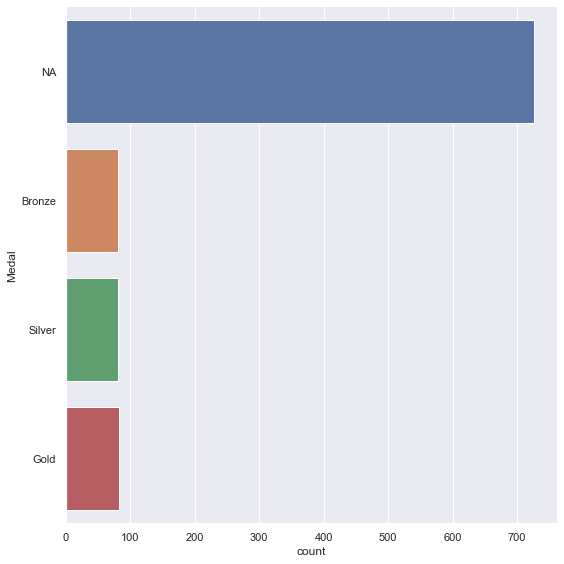

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(728, 6) (728, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(2192, 6) (2192, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,25.000000,69.000000,171.000000,1.720000e+11,38258629.0,4495.717816,NA
1,32.000000,76.000000,178.000000,1.640000e+12,45954106.0,35687.779455,Silver
2,23.000000,90.000000,185.000000,1.800000e+12,207652865.0,8668.312860,NA
3,24.000000,76.000000,178.000000,2.840000e+11,37057452.0,7663.775696,NA
4,23.000000,74.000000,183.000000,1.060000e+12,21249200.0,49884.230936,Bronze
...,...,...,...,...,...,...,...
2187,20.107736,77.169198,181.107736,1.640000e+12,45954106.0,35687.779455,Silver
2188,22.825853,74.000000,176.904488,4.680000e+11,11348159.0,41240.169441,Silver
2189,28.000000,77.021641,181.630598,4.680000e+11,11348159.0,41240.169441,Silver
2190,23.000000,80.799730,184.999326,8.290000e+11,16754962.0,49477.880045,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
5775,27.0,76.0,179.0,1.950000e+12,8.221151e+07,23719.307034
5768,23.0,77.0,177.0,7.395237e+10,1.385233e+08,533.862411
5834,32.0,73.0,178.0,1.550000e+12,3.324577e+07,46622.468366
5283,31.0,76.0,173.0,6.510000e+11,1.628178e+07,39983.345800
5945,23.0,83.0,178.0,8.290000e+11,1.675496e+07,49477.880045
...,...,...,...,...,...,...
5892,30.0,76.0,175.0,4.600000e+12,1.324655e+09,3472.602300
5646,28.0,72.0,182.0,7.884519e+10,7.538190e+07,1045.943208
5624,22.0,82.0,186.0,5.450000e+11,4.384743e+07,12429.462799
5715,21.0,70.0,175.0,3.960000e+11,5.250652e+07,7541.921215


Number of Medal Types : 4
Bronze    548
Gold      548
NA        548
Silver    548
Name: Medal, dtype: int64


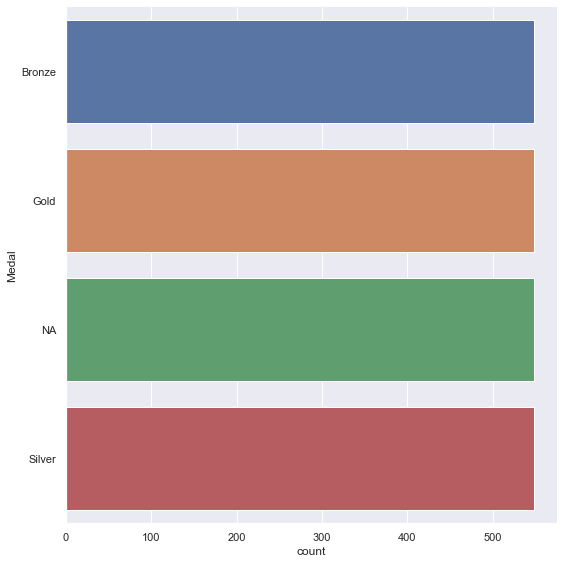

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1644, 1) (1644, 6)
Test Set  : (548, 1) (548, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9981751824817519

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9963503649635036



<AxesSubplot:>

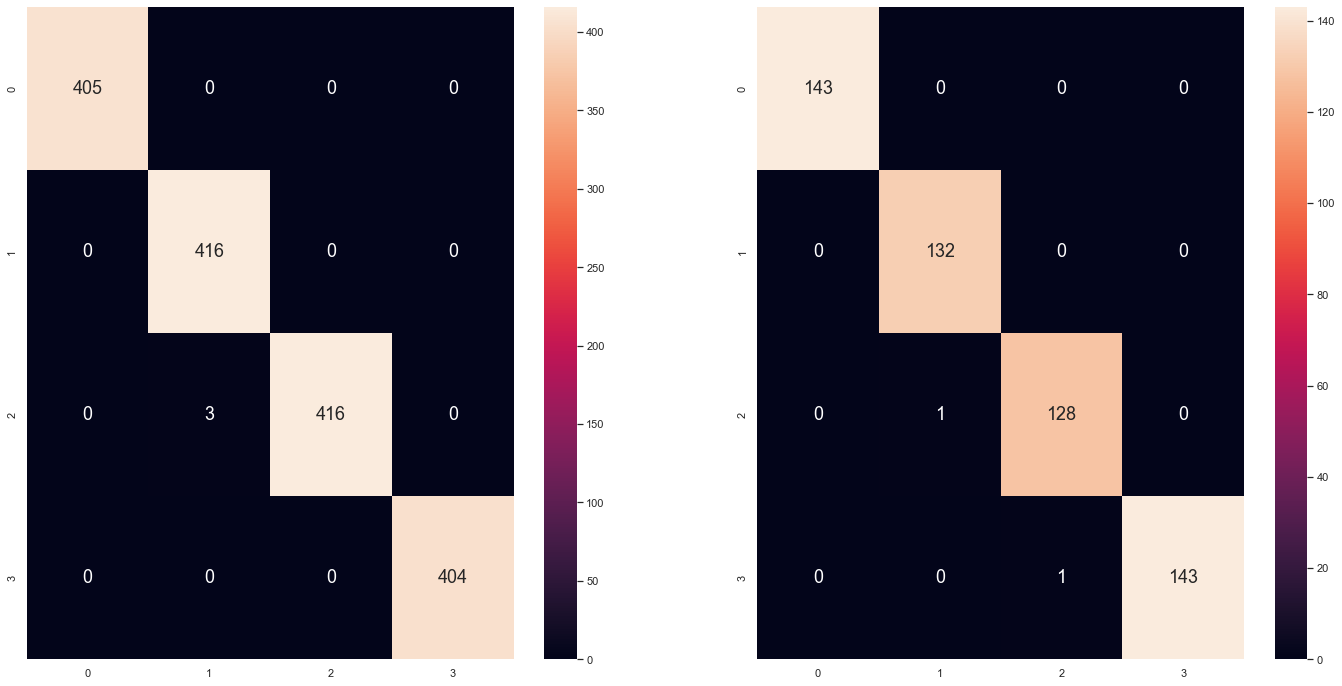

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 8)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

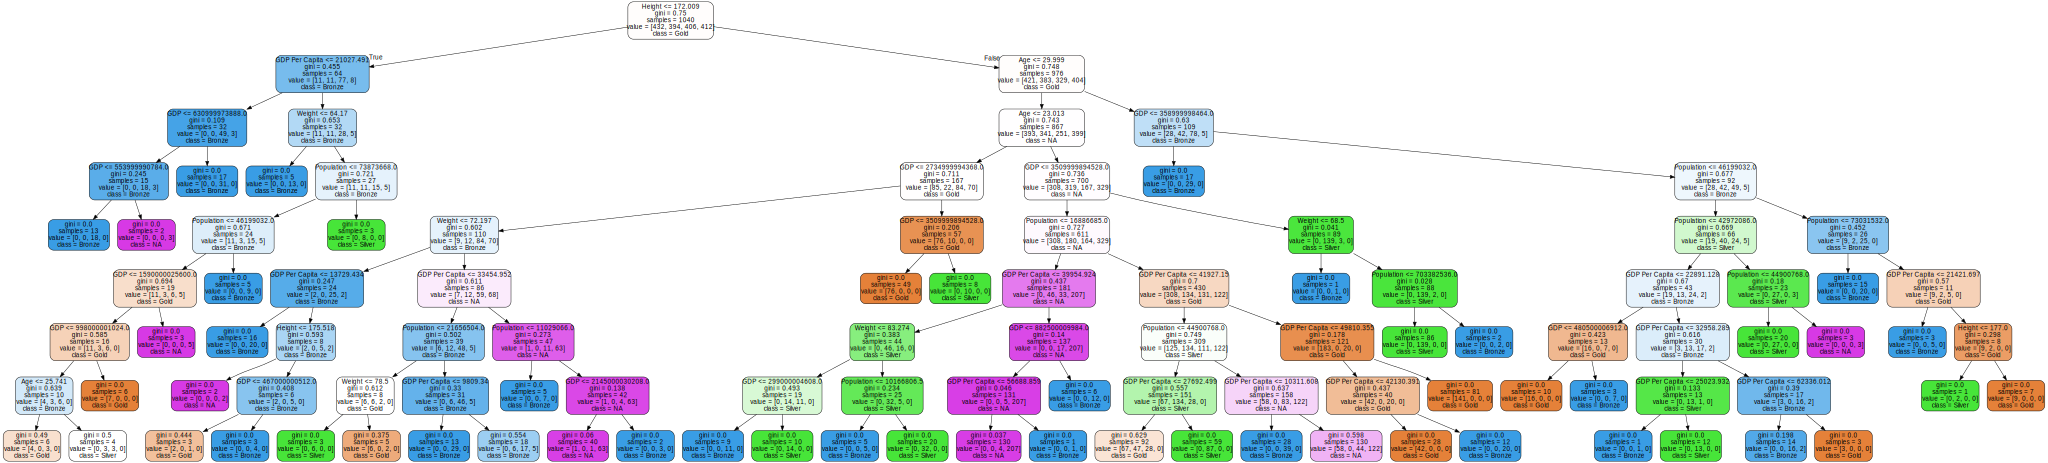

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
graph.render("Tree_male_HOCKEY")

'Tree_male_HOCKEY.pdf'

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.9917695473251029


<AxesSubplot:>

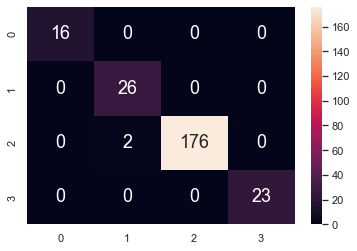

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})